<a href="https://colab.research.google.com/github/Roseyshi/Wine-Quality-Classification/blob/main/Wine_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **WINE QUALITY PREDICTION**
## **BUSINESS PROBLEM**

The goal of the wine quality classification project is to help businesses in the wine industry (such as wineries, distributors, retailers, and quality control labs) assess and predict the quality of wines based on various chemical and sensory attributes.

The business problem can be framed as follows:

1. **Quality Assurance and Control:** Wineries face challenges in ensuring the consistent quality of their wine products. There might be variations in the quality of wine produced from batch to batch due to differences in grape harvest, processing conditions, and storage practices.

2. **Consumer Preference Matching:** Retailers and distributors need a reliable way to categorize wines into quality classes to match consumer preferences and price points. Consumers may have varying preferences based on wine quality, and a business may struggle to provide the right products that meet market demand.

4. **Operational Efficiency in Production:** Understanding the quality of wine based on certain chemical properties allows wineries to adjust their production process (e.g., fermentation time, sugar levels, sulfur dioxide usage) to optimize product quality, thereby reducing waste and increasing profitability.

KPIs (Key Performance Indicators) for Success:
Prediction Accuracy: The percentage of correct predictions made by the wine quality classification model.
Operational Efficiency: Reduction in defects, waste, and production costs based on better classification and quality control.
Sales Growth: Increase in sales due to better matching of wines to consumer preferences and targeted marketing.
Customer Satisfaction: Improvements in customer satisfaction and reviews based on better product offerings.
Regulatory Compliance: Adherence to wine quality regulations and certifications.


## **BUSINESS OBJECTIVE**

1. **Predict Wine Quality Accurately:**

**Objective:** To develop a predictive model that classifies wines into different quality categories (e.g., low, medium, high) based on various chemical features (e.g., acidity, alcohol, sulfur levels).

**Benefit:** Accurate predictions will allow wineries to categorize wines early in the production process, enabling better quality control and reducing the likelihood of substandard batches.

2. **Enhance Product Consistency:**

**Objective:** To use classification results to monitor and control wine quality over time, ensuring that the final product meets the desired standard.

**Benefit:** This will help wineries maintain consistent quality, leading to improved brand reputation, reduced customer complaints, and greater customer loyalty.

3. **Optimize Wine Production and Costs:**

**Objective:** By understanding the relationship between chemical properties and wine quality, wineries can optimize their production methods to reduce costs and increase yield while ensuring high-quality products.

**Benefit:** This can help businesses reduce unnecessary expenses (e.g., excess ingredients, energy, and resources) and focus on producing wines that meet market demand.

4. **Enhance Consumer Experience and Increase Sales:**

**Objective:** To classify wines based on quality and match them with appropriate consumer preferences, marketing strategies, and price points.

**Benefit:** Improved wine selection tailored to customer preferences can drive higher sales, attract more customers, and allow for better segmentation of the market (e.g., premium vs. budget wines).

5. **Improve Marketing and Branding Strategies:**

**Objective:** To leverage wine quality classification insights for more effective marketing strategies and branding efforts (e.g., premium labeling for higher-quality wines).

**Benefit:** Better-targeted marketing campaigns can enhance the brand’s position in the market, increase brand loyalty, and attract more consumers willing to pay a premium for high-quality wines.

6. **Regulatory Compliance and Certification:**

**Objective:** In some regions, there are strict regulations on wine labeling and classification. The model could be used to ensure that wine batches meet specific quality criteria for legal and regulatory standards.

**Benefit:** Meeting regulatory standards will avoid penalties and ensure that wines are properly classified for export or sale within the country.


## **KPIs (Key Performance Indicators) for Success**

**Prediction Accuracy:** The percentage of correct predictions made by the wine quality classification model.

**Operational Efficiency:** Reduction in defects, waste, and production costs based on better classification and quality control.

**Sales Growth:** Increase in sales due to better matching of wines to consumer preferences and targeted marketing.

**Customer Satisfaction:** Improvements in customer satisfaction and reviews based on better product offerings.

**Regulatory Compliance:** Adherence to wine quality regulations and certifications.

## **DATA UNDERSTANDING**

**Source of the Data**
The dataset for this project was obtained from Kaggle. It contains physicochemical properties of wines and their corresponding quality scores. These quality scores range from a numerical scale and are based on sensory data collected by wine experts.

**Dataset Description**
Total Samples: [Mention the total number of rows in the dataset].
Features: The dataset includes several physicochemical properties of wine, such as:

1. Fixed Acidity
2. Volatile Acidity
3. Citric Acid
4. Residual Sugar
5. Chlorides
6. Free Sulfur Dioxide
7. Total Sulfur Dioxide
8. Density
9. pH
10. Sulphates
11. Alcohol

**Target Variable:** Quality – This represents the wine's quality score, rated between [minimum value] and [maximum value].

In [ ]:
#Importing libraries and packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import pickle
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Load and read the dataset
data = pd.read_csv("/content/winequalityN.csv")
data.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
data.shape

(6497, 13)

### **Data Overview**
This section determines:


1.   Data Consistency
2.   Data Uniformity
3.   Data completeness






**Data Consistency**

In [ ]:
#Check for duplicates
data.duplicated().sum()

1168

There are 1168 duplicates in the data. These will be dropped to ensure that the model is not bias based on the duplicates.

**Data Uniformity**

In [ ]:
#Check for the data types of the columns
data.dtypes

,0
type,object
fixed acidity,float64
volatile acidity,float64
citric acid,float64
residual sugar,float64
chlorides,float64
free sulfur dioxide,float64
total sulfur dioxide,float64
density,float64
pH,float64


Columns have the correct types. Feature engineering will not be done.

**Data Completeness**

In [ ]:
data.isnull().sum()

,0
type,0
fixed acidity,10
volatile acidity,8
citric acid,3
residual sugar,2
chlorides,2
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,9


There are several columns with null rows, they do have much impact on the project since they are few. They will be dropped.

### **Data Cleaning**

Thsi will encompass:


1.   Dropping duplicated rows.
2.   Dropping null values.
3.   Dropping unnecessary columns.



In [ ]:
#Drop duplicated rows
data.drop_duplicates(inplace = True)

In [ ]:
#Drop null entries
data.dropna(inplace= True)

In [ ]:
#Drop unnecessary columns
data.drop(columns = ['type'], axis = 1, inplace = True)

## **Exploratory Data Analysis**

The goal of this is to provide a visual explanation of the data.

**Distribution of target column**

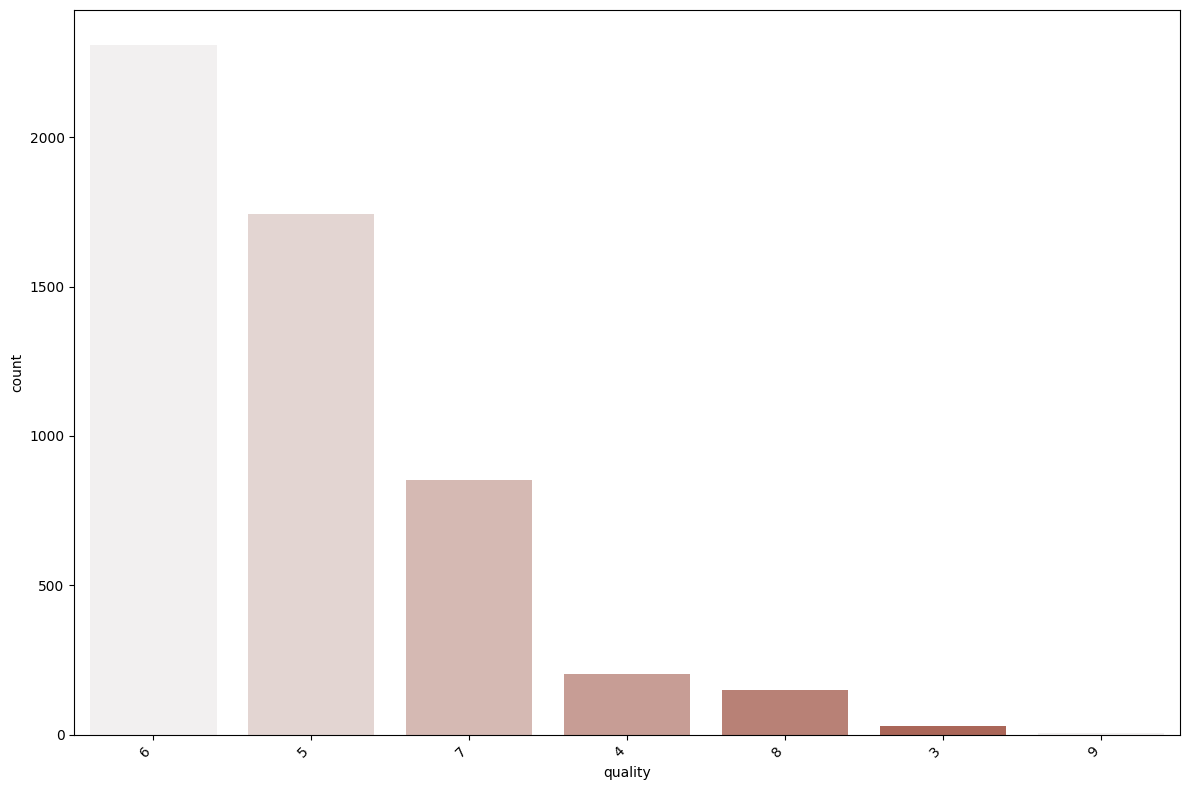

In [ ]:
# Calculate the order of categories based on their size
sorted_categories = data['quality'].value_counts().index

# Plot the count plot
color = sns.light_palette((20, 60, 50), input="husl")
plt.figure(figsize=(12, 8))
sns.countplot(
    x='quality',
    data=data,
    palette=color,
    order=sorted_categories  # Align bars by size
)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Quality 6 has more entries followed by 5, 7, 4, 8, 3, 9. Thsi shows data imbalance which will need to be taken care of using SMOTE technique.

**Relationship between alcohol and quality**

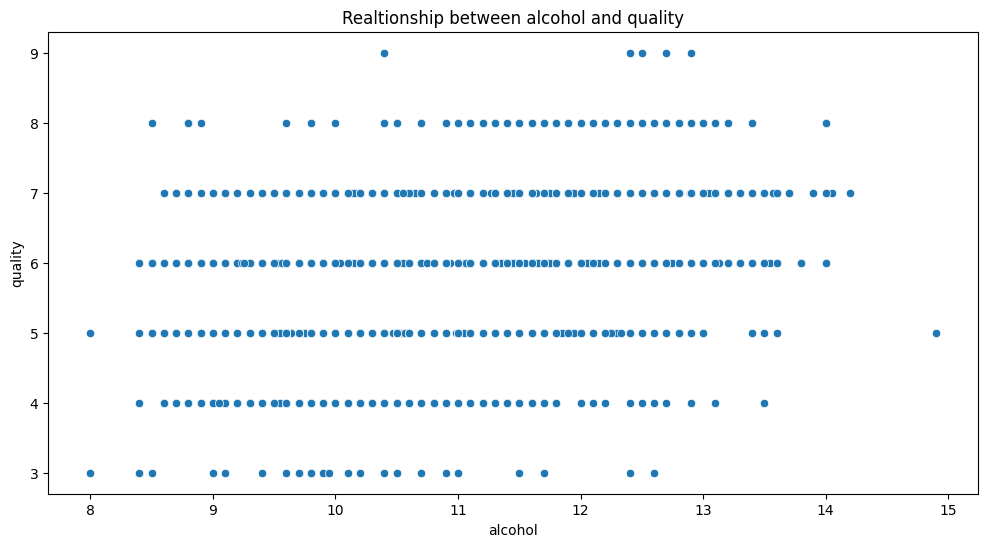

In [ ]:
plt.figure(figsize = (12,6))
sns.scatterplot(data = data, x = 'alcohol', y = 'quality')
plt.title("Realtionship between alcohol and quality")
plt.show()

There is no particular correlation between alcohol and quality.

**Relationship of total sulfur dioxide and free sulfur dioxide on quality**

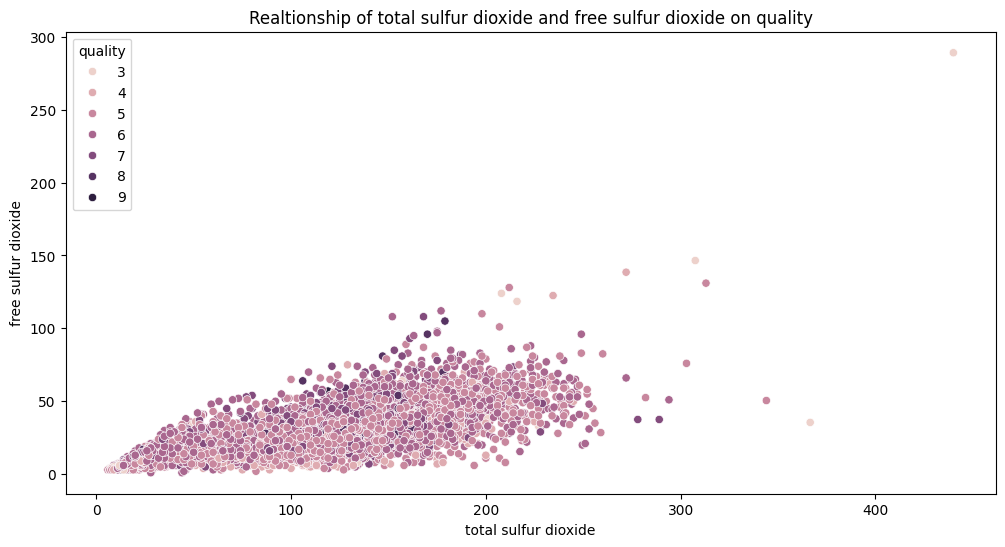

In [ ]:
plt.figure(figsize = (12,6))
sns.scatterplot(data = data, x = 'total sulfur dioxide', y = 'free sulfur dioxide', hue = 'quality')
plt.title("Realtionship of total sulfur dioxide and free sulfur dioxide on quality")
plt.show()

Larger amounts of total sulfur dioxide have a greater effect on the quality of the wine as compared to same quantities of free sulfur dioxide.

**Correlation**

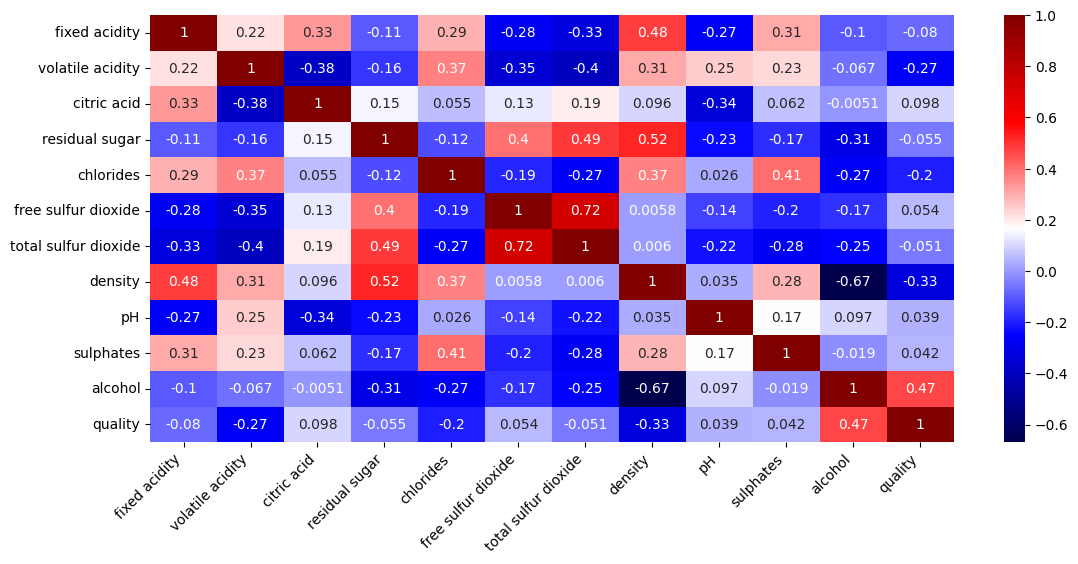

In [ ]:
#Create a correlation heatmap
plt.figure(figsize=(12,6))
sns.heatmap(
    data.corr(),
    annot=True,
    cmap='seismic',
)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout(pad=2)
plt.show()

We will be on the look out for columns that seem to have correlation. These will have an effect on the model by virtue of multicorrelation. Density and alcohol seem to be columns with a high multicorrelation of 0.67 and therefore further analysis will be done on how they afftect the quality of the wine.

### **Feature Engineering**

In this case feature engineering will apply on the imbalance noticd earlier. SMOTE technique will be used in thsi case.

**Split the data into feature and target columns.**

In [ ]:
#Drop quality column which is the target column and assign it to y
X = data.drop(columns = ['quality'], axis = 1)
y = data['quality']

**Standard Scaling**

StandardScaler operates on the principle of normalization, where it transforms the distribution of each feature to have a mean of zero and a standard deviation of one. This process ensures that all features are on the same scale, preventing any single feature from dominating the learning process due to its larger magnitude.

**Impact on Data Distribution:**
StandardScaler does not alter the shape of the distribution of each feature; it only shifts and scales it. As a result, the relative relationships between feature values are preserved, making it suitable for datasets with non-Gaussian distributions.

**Advantages:**
1. Enhances Model Performance: StandardScaler helps improve the performance and convergence of machine learning models, particularly those sensitive to feature scales, such as linear regression, logistic regression, and support vector machines.
2. Facilitates Interpretability: By standardizing features, StandardScaler makes it easier to interpret the coefficients or weights assigned to each feature in linear models.
3. Robustness to Outliers: StandardScaler is relatively robust to the presence of outliers compared to min-max scaling, as it relies on the mean and standard deviation rather than the range of the data.
Considerations:
4. Data Leakage: It's crucial to fit StandardScaler only on the training data and then apply the same transformation to the testing data to avoid data leakage and ensure model generalization.

In [ ]:
#Initialize standard scaler
scaler = StandardScaler()

#Fit and transform on X
X_scaled = scaler.fit_transform(X)

**SMOTE**

Synthetic Minority Oversampling Technique, is a sampling technique that generates synthetic examples of the minority class in a dataset to balance the class distribution. It's commonly used when the class being analyzed is underrepresented.

In [ ]:
# Compute the number of samples in the smallest class
minority_class_count = min(pd.Series(y).value_counts())
k_neighbors = min(5, minority_class_count - 1)  # Adjust k_neighbors accordingly

#Initialize smote with parameters
smote = SMOTE(k_neighbors=k_neighbors, random_state=42)
X_balanced, y_balanced = smote.fit_resample(X_scaled, y)

#Determine the nummbers
print("Class distribution after SMOTE: \n", y_balanced.value_counts())

Class distribution after SMOTE: 
 quality
6    2311
5    2311
7    2311
8    2311
4    2311
3    2311
9    2311
Name: count, dtype: int64


**Split the data into train and test**

In [ ]:
#Split the scaled data to train and test
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size = 0.3, random_state = 42)

### **Model Selection**

The project is a classification project and therefore will require classification models. For this case, we will evaluate the prfromance of Logistic regression, Random forest Classifier and KNearest neighbors.

1. **Logistic Regression** is a linear model used for binary classification tasks (e.g., predicting 0 or 1).
It estimates the probability that a data point belongs to a certain class using the logistic (sigmoid) function. The output of the sigmoid function is between 0 and 1, representing the probability of the positive class.Thresholds (e.g., 0.5) are used to classify data into two categories.

2. **Random Forest Classifier** is an ensemble method that combines multiple decision trees to make more robust predictions. It builds multiple decision trees on random subsets of data (using bootstrapping). Each tree splits features at decision nodes to minimize impurity (e.g., Gini Index or Entropy).
For classification, it aggregates the predictions from all trees (majority vote). By combining many "weak learners" (individual decision trees), Random Forest reduces overfitting and improves generalization.

3. **K-Nearest Neighbors (KNN)** is a lazy learning algorithm that classifies data points based on the majority class of their K nearest neighbors in the feature space. No explicit training. It simply stores the data. To classify a new data point. Computes the distance (e.g., Euclidean) between the point and all existing points. Identifies the K closest points. Assign the majority class among these neighbors.

**Logistic Regression**

In [ ]:
#Initialize the model
lr = LogisticRegression(max_iter=1000)


#Fit the model
lr.fit(X_train, y_train)

#Use the model to predict on testing data
y_pred_lr = lr.predict(X_test)

#Prediction probabilities
y_pred_lr_prob = lr.predict_proba(X_test)

#Evaluate the model
accuracy_lr = accuracy_score(y_test, y_pred_lr)
report_lr = classification_report(y_test, y_pred_lr)
matrix_lr = confusion_matrix(y_test, y_pred_lr)

print("Accuracy:", accuracy_lr)
print("Classification Report:", report_lr)
print("Confusion Matrix:", matrix_lr)

Accuracy: 0.5121549237742068
Classification Report:               precision    recall  f1-score   support

           3       0.42      0.42      0.42       660
           4       0.48      0.50      0.49       727
           5       0.45      0.43      0.44       691
           6       0.34      0.24      0.28       711
           7       0.42      0.39      0.41       677
           8       0.50      0.60      0.54       711
           9       0.88      1.00      0.94       677

    accuracy                           0.51      4854
   macro avg       0.50      0.51      0.50      4854
weighted avg       0.50      0.51      0.50      4854

Confusion Matrix: [[279 154  64  45  11  74  33]
 [127 366 100  78  35  21   0]
 [115 137 297  84  32  23   3]
 [ 84  77 141 172 135  96   6]
 [ 32  22  33  77 265 224  24]
 [ 31   9  21  44 148 430  28]
 [  0   0   0   0   0   0 677]]


The perfromance of logisticregression model is not satisfcatory at 52%. Others model will be used to improve on this performance.

**Random Forest Classifier**

In [ ]:
#Initialize RandomForestClassifier
rf = OneVsRestClassifier(RandomForestClassifier(n_estimators = 75, max_depth = 10, random_state = 42))

#Fit the model
rf.fit(X_train, y_train)

#Predict the modle using the test data
y_pred_rf = rf.predict(X_test)

#Prediction probability
y_pred_rf_prob = rf.predict_proba(X_test)

#Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)
matrix_rf = confusion_matrix(y_test, y_pred_rf)

print("Accuracy:", accuracy_rf)
print("Classification Report:", report_rf)
print("Confusion Matrix:", matrix_rf)

Accuracy: 0.8195302843016069
Classification Report:               precision    recall  f1-score   support

           3       0.96      0.98      0.97       660
           4       0.87      0.92      0.89       727
           5       0.65      0.73      0.69       691
           6       0.63      0.35      0.45       711
           7       0.70      0.81      0.75       677
           8       0.89      0.96      0.92       711
           9       0.99      1.00      0.99       677

    accuracy                           0.82      4854
   macro avg       0.81      0.82      0.81      4854
weighted avg       0.81      0.82      0.81      4854

Confusion Matrix: [[645   7   8   0   0   0   0]
 [  5 671  34   8   9   0   0]
 [  8  48 507  88  35   5   0]
 [  9  38 206 250 173  32   3]
 [  4  10  21  44 546  49   3]
 [  1   0   2   3  22 683   0]
 [  0   0   0   1   0   0 676]]


OvesRest Random classifier has done a better job at classification with an acuracy of 86.5%. Hyperparameters can be tuned to check if accurcay can be improved further.

**KNearest Neighbors**

In [ ]:
# Initialize K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the model
knn.fit(X_train, y_train)

# Predict the model using the test data
y_pred_knn = knn.predict(X_test)

# Prediction probabilities (optional, if needed)
y_pred_knn_prob = knn.predict_proba(X_test)

# Evaluate the model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
report_knn = classification_report(y_test, y_pred_knn)
matrix_knn = confusion_matrix(y_test, y_pred_knn)

print("Accuracy:", accuracy_knn)
print("Classification Report:", report_knn)
print("Confusion Matrix:", matrix_knn)

Accuracy: 0.8088174701277298
Classification Report:               precision    recall  f1-score   support

           3       0.91      1.00      0.95       660
           4       0.80      0.99      0.89       727
           5       0.67      0.60      0.63       691
           6       0.59      0.27      0.37       711
           7       0.72      0.82      0.77       677
           8       0.85      0.99      0.92       711
           9       1.00      1.00      1.00       677

    accuracy                           0.81      4854
   macro avg       0.79      0.81      0.79      4854
weighted avg       0.79      0.81      0.79      4854

Confusion Matrix: [[660   0   0   0   0   0   0]
 [  2 720   4   1   0   0   0]
 [ 35  89 416  93  46  12   0]
 [ 27  83 186 192 166  55   2]
 [  5   8  18  39 554  53   0]
 [  0   0   0   0   4 707   0]
 [  0   0   0   0   0   0 677]]


KNN does not seem to perfrom too badly but in thsi case with an accuracy score of 80%. For this reason Random forest will proceed to determine what parameters can be tweaked in order to improve its perfromance.

### **Multiclass ROC-Curve**

ROC-Curve is a measure of model performance that is combined with other metrics. It measures sensitivity and 1-specificity of the model. Generally we want to see a large area between the curve and the 45 degreess diagoonal line. We also use the AUC(area under curve) as a measure of perfromance. For a model that is performing well, the AUC is greater than 0.7. We will use these measures to confirm that our accuracy score is inline with ROC-AUC.

**Combined performance of all models**

This aims at capturing which class is better predicted based on combined probabilities of the three models

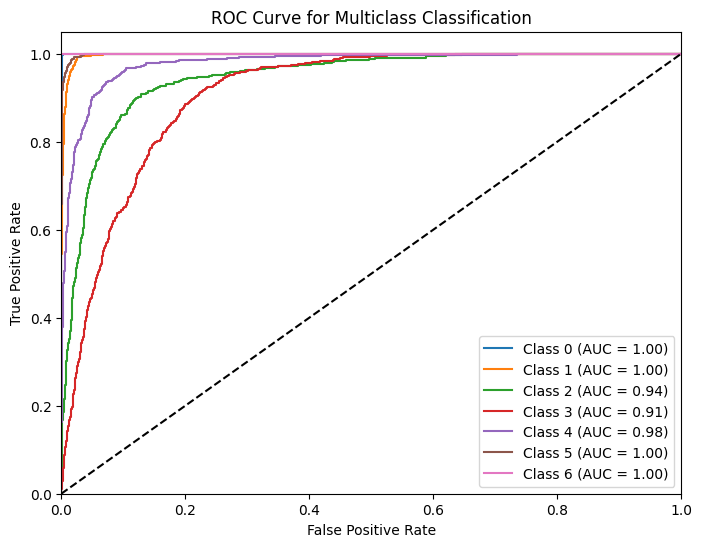

In [ ]:
#Binarize the output (convert it into one-vs-all format)
#y_binarized = label_binarize(y_train, classes=[0, 1, 2])

# Binarize the y_test
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))

# Combine the probabilities for plotting the ROC curve
y_pred_prob_combined = (y_pred_lr_prob + y_pred_rf_prob + y_pred_knn_prob) / 3

# Compute ROC curve and AUC for each class
fpr = {}
tpr = {}
thresh = {}
roc_auc = dict()

# Number of classes
n_classes = y_test_binarized.shape[1]

# Compute ROC curve and ROC area for each class
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_prob_combined[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Step 4: Plot the ROC curves
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multiclass Classification')
plt.legend(loc='lower right')
plt.show()

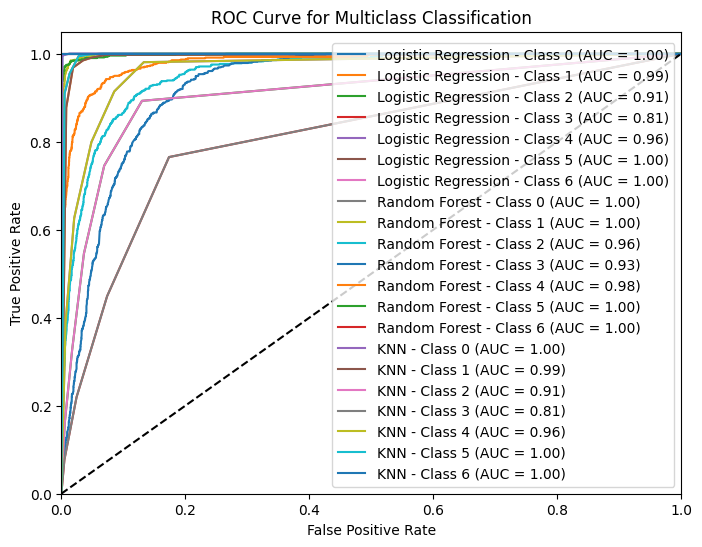

In [ ]:
#Binarize the output (convert it into one-vs-all format)
y_test_binarized = label_binarize(y_test, classes=[3,4,5,6,7,8,9])

# Number of classes
n_classes = y_test_binarized.shape[1]

# Compute ROC curve and AUC for each class
fpr = {}
tpr = {}
roc_auc = {}

# Compute ROC curve and ROC area for each class for logistic regression
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_knn_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for Logistic Regression
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Logistic Regression - Class {i} (AUC = {roc_auc[i]:.2f})')

# Compute ROC curve and AUC for Random Forest
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_rf_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for Random Forest
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Random Forest - Class {i} (AUC = {roc_auc[i]:.2f})')

# Compute ROC curve and AUC for XGBoost
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_knn_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for XGBoost
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'KNN - Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multiclass Classification')
plt.legend(loc='lower right')
plt.show()

### **Hyperparameter Tuning**

We have identified that Random Forest is our best model based on the above metrics with an accuracy score of 87%. However, a model's parameters can be tuned for optimized performance. Random Forest in this case can perform better when parameters such as no_of_estimators, max_depth and no_of_iterations are optimized. Other times default parameters will do better.

In [ ]:
%# Define the parameter grid
param_grid = {
    'n_estimators': [50,100],  # Number of trees in the forest
    'max_depth': [None, 2],  # Maximum depth of the trees
    'min_samples_split': [2, 5],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2],  # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt']  # Number of features to consider when looking for the best split
}
#Initialize Random Forest
rf_classifier = RandomForestClassifier(random_state = 42)

#Initialize GridSearchCV
grid_search = GridSearchCV(estimator = rf_classifier,param_grid = param_grid, cv = 3, n_jobs = 1, verbose = 2)

#Fit the model
grid_search.fit(X_train, y_train)

#Find best parameters
best_params = grid_search.best_params_
print("Best parameters are:", best_params)

# Get the best model
rf_best = grid_search.best_estimator_

#Test accuracy
y_pred_rf_best = rf_best.predict(X_test)
print("Accuracy score:", accuracy_score(y_test, y_pred_rf_best))

Fitting 3 folds for each of 32 candidates, totalling 96 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_es

Despite hyperparameter tuning, the default paraemeters performed much better.Therefore default parameters will be the best for our model.

In [ ]:
# Save the model to a file
with open('best_random_forest_model.pkl', 'wb') as file:
    pickle.dump(rf, file)

In [ ]:
from joblib import dump
dump(rf, 'best_random_forest_compressed.joblib', compress=('gzip', 9))  # High compression


['best_random_forest_compressed.joblib']

**FEATURE IMPORTANCE**

In [ ]:
#Assuming you have a list of feature names
X_train = pd.DataFrame(X_train, columns=X.columns)
feature_names = X_train.columns

# Loop through each binary classifier to plot feature importances for each class
for idx, estimator in enumerate(rf.estimators_):
    # Create a DataFrame for feature importances
    importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': estimator.feature_importances_
    })

    # Sort features by importance
    importance_df = importance_df.sort_values(by='Importance', ascending=False)

    # Plot feature importances
    color = (0.2, 0.4, 0.2, 0.6)
    plt.figure(figsize=(10, 6))
    plt.barh(importance_df['Feature'], importance_df['Importance'], color=color)
    plt.xlabel('Importance')
    plt.title(f'Feature Importances for Class {idx}')
    plt.gca().invert_yaxis()
    plt.show()

In [ ]:
# Print the mapping of labels
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label encoding mapping:", label_mapping)

**Conlusion**

## **RECOMMENDATIONS:**

**Potential Use Cases**

**Wine Quality Forecasting for Production:**

Allow wine producers to predict and monitor the quality of their batches based on the input features, making adjustments to the production process early on to avoid poor-quality outputs.

**Wine Matching for Retailers:**

Enable retailers to group wines into quality categories and recommend wines to customers based on their quality preferences, enhancing the shopping experience.

**Customer Feedback and Quality Metrics:**

Link the predicted wine quality to customer reviews or feedback to continually improve production and customer satisfaction.

**Sustainability and Waste Reduction:**

Identify wines with lower quality early in the production process, allowing producers to reduce wastage by altering their production approach or repurposing lower-quality wines for different products (e.g., blends).
